In [ ]:
!git clone https://github.com/zhn66776/Tidal_try.git

Cloning into 'Tidal_try'...
remote: Enumerating objects: 431, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 431 (delta 35), reused 0 (delta 0), pack-reused 355 (from 1)
Receiving objects: 100% (431/431), 59.23 MiB | 14.10 MiB/s, done.
Resolving deltas: 100% (166/166), done.


In [ ]:
cd Tidal_try

/content/Tidal_try


In [ ]:
with open("./dataProcessed/can1998") as f:
    lines = f.readlines()

print("".join(lines[:5]))

         0 1998  1  1  0.0000     1.200 0
      3600 1998  1  1  1.0000     1.430 0
      7200 1998  1  1  2.0000     1.730 0
     10800 1998  1  1  3.0000     2.030 0
     14400 1998  1  1  4.0000     2.380 0



In [ ]:
import pandas as pd

names = ["seconds", "year", "month", "day", "hour", "Water_Level_LAT", "flag"]

obs = pd.read_csv(
    "./dataProcessed/can1998",
    names=names,
    skipinitialspace=True,
    delim_whitespace=True,
    na_values="9.990",
)

obs['time'] = pd.to_datetime(obs[['year', 'month', 'day', 'hour']])

obs = obs.drop(columns=["year", "month", "day", "hour"])

obs = obs.set_index('time')

obs.head(5)


<ipython-input-13-222c38f42ae7>:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  obs = pd.read_csv(


,seconds,Water_Level_LAT,flag
time,,,
1998-01-01 00:00:00,0,1.20,0
1998-01-01 01:00:00,3600,1.43,0
1998-01-01 02:00:00,7200,1.73,0
1998-01-01 03:00:00,10800,2.03,0
1998-01-01 04:00:00,14400,2.38,0


In [ ]:
obs.to_csv('./dataProcessed/cannew.csv', index=True)


In [ ]:
import pandas as pd
import numpy as np

obs = pd.read_csv('./dataProcessed/cannew.csv')

bad = obs["flag"] == 2
corrected = obs["flag"] == 1

obs.loc[bad, "elev"] = np.nan

obs["anomaly"] = obs["elev"] - obs["elev"].mean()

obs["anomaly"] = obs["anomaly"].interpolate()

obs.to_csv('./dataProcessed/procan.csv', index=False)


In [ ]:
data = pd.read_csv('dataProcessed/janu.csv')
print(data.head())

   number                 time  Water_Level_LAT  residue
0       1  2024/01/01 00:00:00            1.977    0.304
1       2  2024/01/01 00:15:00            2.080    0.266
2       3  2024/01/01 00:30:00            2.200    0.237
3       4  2024/01/01 00:45:00            2.335    0.217
4       5  2024/01/01 01:00:00            2.459    0.186


In [ ]:
data = pd.read_csv('dataProcessed/cannew.csv')
print(data.head())

                  time  seconds  Water_Level_LAT  flag
0  1998-01-01 00:00:00        0             1.20     0
1  1998-01-01 01:00:00     3600             1.43     0
2  1998-01-01 02:00:00     7200             1.73     0
3  1998-01-01 03:00:00    10800             2.03     0
4  1998-01-01 04:00:00    14400             2.38     0


Data loading...


100%|██████████| 8740/8740 [00:00<00:00, 467668.78it/s]

测试集大小为761
Model loading...



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Training...


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 0 batch: 0 | loss: 0.04945443198084831
Epoch: 0 batch: 10 | loss: 0.04472023621201515
Epoch: 0 batch: 20 | loss: 0.020715758204460144
Epoch: 0 batch: 30 | loss: 0.00277696899138391
Epoch: 0 batch: 40 | loss: 0.02286740206182003
Epoch: 0 batch: 50 | loss: 0.03914191573858261
Epoch: 0 batch: 60 | loss: 0.027716977521777153
Epoch: 0 batch: 70 | loss: 0.011031274683773518
Epoch: 0 batch: 80 | loss: 0.017876993864774704
Epoch: 0 batch: 90 | loss: 0.041417498141527176
Epoch: 0 batch: 100 | loss: 0.03805645927786827
Epoch: 0 batch: 110 | loss: 0.012281631119549274
Epoch: 0 batch: 120 | loss: 0.015884237363934517
Epoch: 0 batch: 130 | loss: 0.035867802798748016
Epoch: 0 batch: 140 | loss: 0.031032221391797066
Epoch: 0 batch: 150 | loss: 0.013830067589879036
Epoch: 0 batch: 160 | loss: 0.017220232635736465
Epoch: 0 batch: 170 | loss: 0.026499060913920403
Epoch: 0 batch: 180 | loss: 0.034656792879104614
Epoch: 0 batch: 190 | loss: 0.01630323752760887
Epoch: 0 batch: 200 | loss: 0.00492857

26it [00:00, 113.13it/s]

Epoch: 0 valLoss: 0.023073965988094955



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 1 batch: 0 | loss: 0.019688410684466362
Epoch: 1 batch: 10 | loss: 0.03292980045080185
Epoch: 1 batch: 20 | loss: 0.018400229513645172
Epoch: 1 batch: 30 | loss: 0.0023957055527716875
Epoch: 1 batch: 40 | loss: 0.02141866832971573
Epoch: 1 batch: 50 | loss: 0.040349118411540985
Epoch: 1 batch: 60 | loss: 0.0258078183978796
Epoch: 1 batch: 70 | loss: 0.009866030886769295
Epoch: 1 batch: 80 | loss: 0.016375986859202385
Epoch: 1 batch: 90 | loss: 0.040680307894945145
Epoch: 1 batch: 100 | loss: 0.03607118874788284
Epoch: 1 batch: 110 | loss: 0.012589843943715096
Epoch: 1 batch: 120 | loss: 0.015351219102740288
Epoch: 1 batch: 130 | loss: 0.033647723495960236
Epoch: 1 batch: 140 | loss: 0.03049185499548912
Epoch: 1 batch: 150 | loss: 0.014404475688934326
Epoch: 1 batch: 160 | loss: 0.016143914312124252
Epoch: 1 batch: 170 | loss: 0.023578550666570663
Epoch: 1 batch: 180 | loss: 0.031296130269765854
Epoch: 1 batch: 190 | loss: 0.014950166456401348
Epoch: 1 batch: 200 | loss: 0.004377

26it [00:00, 114.47it/s]

Epoch: 1 valLoss: 0.016004866437855723



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 2 batch: 0 | loss: 0.013986282981932163
Epoch: 2 batch: 10 | loss: 0.023278100416064262
Epoch: 2 batch: 20 | loss: 0.010095634497702122
Epoch: 2 batch: 30 | loss: 0.0025565787218511105
Epoch: 2 batch: 40 | loss: 0.014299667440354824
Epoch: 2 batch: 50 | loss: 0.023223834112286568
Epoch: 2 batch: 60 | loss: 0.011545521207153797
Epoch: 2 batch: 70 | loss: 0.0026912738103419542
Epoch: 2 batch: 80 | loss: 0.0039321379736065865
Epoch: 2 batch: 90 | loss: 0.016274940222501755
Epoch: 2 batch: 100 | loss: 0.008034984581172466
Epoch: 2 batch: 110 | loss: 0.0027528065256774426
Epoch: 2 batch: 120 | loss: 0.004527986515313387
Epoch: 2 batch: 130 | loss: 0.005735480226576328
Epoch: 2 batch: 140 | loss: 0.004040243104100227
Epoch: 2 batch: 150 | loss: 0.004109763074666262
Epoch: 2 batch: 160 | loss: 0.0038010389544069767
Epoch: 2 batch: 170 | loss: 0.0058421301655471325
Epoch: 2 batch: 180 | loss: 0.004162515979260206
Epoch: 2 batch: 190 | loss: 0.003968588542193174
Epoch: 2 batch: 200 | los

26it [00:00, 79.58it/s]

Epoch: 2 valLoss: 0.002402624569184957



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 3 batch: 0 | loss: 0.0074614109471440315
Epoch: 3 batch: 10 | loss: 0.004214316140860319
Epoch: 3 batch: 20 | loss: 0.0026193270459771156
Epoch: 3 batch: 30 | loss: 0.003021525451913476
Epoch: 3 batch: 40 | loss: 0.00382014038041234
Epoch: 3 batch: 50 | loss: 0.00514734722673893
Epoch: 3 batch: 60 | loss: 0.005859862547367811
Epoch: 3 batch: 70 | loss: 0.0016316293040290475
Epoch: 3 batch: 80 | loss: 0.0028865861240774393
Epoch: 3 batch: 90 | loss: 0.002931540133431554
Epoch: 3 batch: 100 | loss: 0.005437725689262152
Epoch: 3 batch: 110 | loss: 0.0014536139788106084
Epoch: 3 batch: 120 | loss: 0.0033999700099229813
Epoch: 3 batch: 130 | loss: 0.0044871848076581955
Epoch: 3 batch: 140 | loss: 0.0030193354468792677
Epoch: 3 batch: 150 | loss: 0.0022711860947310925
Epoch: 3 batch: 160 | loss: 0.0023526358418166637
Epoch: 3 batch: 170 | loss: 0.0029750948306173086
Epoch: 3 batch: 180 | loss: 0.0028241619002074003
Epoch: 3 batch: 190 | loss: 0.003221942111849785
Epoch: 3 batch: 200 |

26it [00:00, 111.62it/s]

Epoch: 3 valLoss: 0.0019511532567097322



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 4 batch: 0 | loss: 0.004198016598820686
Epoch: 4 batch: 10 | loss: 0.00345537718385458
Epoch: 4 batch: 20 | loss: 0.00244434317573905
Epoch: 4 batch: 30 | loss: 0.002076453994959593
Epoch: 4 batch: 40 | loss: 0.0040305908769369125
Epoch: 4 batch: 50 | loss: 0.005724796559661627
Epoch: 4 batch: 60 | loss: 0.003369505750015378
Epoch: 4 batch: 70 | loss: 0.0017882174579426646
Epoch: 4 batch: 80 | loss: 0.0016988529823720455
Epoch: 4 batch: 90 | loss: 0.00232409848831594
Epoch: 4 batch: 100 | loss: 0.002480067778378725
Epoch: 4 batch: 110 | loss: 0.001371045713312924
Epoch: 4 batch: 120 | loss: 0.0034971791319549084
Epoch: 4 batch: 130 | loss: 0.003979453817009926
Epoch: 4 batch: 140 | loss: 0.0024634103756397963
Epoch: 4 batch: 150 | loss: 0.0040423753671348095
Epoch: 4 batch: 160 | loss: 0.002113325521349907
Epoch: 4 batch: 170 | loss: 0.003322562202811241
Epoch: 4 batch: 180 | loss: 0.0032626886386424303
Epoch: 4 batch: 190 | loss: 0.002157005248591304
Epoch: 4 batch: 200 | loss:

26it [00:00, 111.73it/s]

Epoch: 4 valLoss: 0.0017897474351455805



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 5 batch: 0 | loss: 0.005137837491929531
Epoch: 5 batch: 10 | loss: 0.003106006421148777
Epoch: 5 batch: 20 | loss: 0.002214273437857628
Epoch: 5 batch: 30 | loss: 0.001855696551501751
Epoch: 5 batch: 40 | loss: 0.0034817615523934364
Epoch: 5 batch: 50 | loss: 0.006176345515996218
Epoch: 5 batch: 60 | loss: 0.0029743718914687634
Epoch: 5 batch: 70 | loss: 0.002275716047734022
Epoch: 5 batch: 80 | loss: 0.0022948100231587887
Epoch: 5 batch: 90 | loss: 0.0014424821129068732
Epoch: 5 batch: 100 | loss: 0.0021739047951996326
Epoch: 5 batch: 110 | loss: 0.0011844831751659513
Epoch: 5 batch: 120 | loss: 0.0031992632430046797
Epoch: 5 batch: 130 | loss: 0.003079184563830495
Epoch: 5 batch: 140 | loss: 0.0022045259829610586
Epoch: 5 batch: 150 | loss: 0.0026375248562544584
Epoch: 5 batch: 160 | loss: 0.0012766870204359293
Epoch: 5 batch: 170 | loss: 0.004893139936029911
Epoch: 5 batch: 180 | loss: 0.0027507436461746693
Epoch: 5 batch: 190 | loss: 0.0020984855946153402
Epoch: 5 batch: 200

26it [00:00, 77.43it/s]

Epoch: 5 valLoss: 0.0015280261938440257



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 6 batch: 0 | loss: 0.0036889109760522842
Epoch: 6 batch: 10 | loss: 0.0021452168002724648
Epoch: 6 batch: 20 | loss: 0.0017569526098668575
Epoch: 6 batch: 30 | loss: 0.0024818505626171827
Epoch: 6 batch: 40 | loss: 0.0017571953358128667
Epoch: 6 batch: 50 | loss: 0.004360581282526255
Epoch: 6 batch: 60 | loss: 0.0026948621962219477
Epoch: 6 batch: 70 | loss: 0.0019493517465889454
Epoch: 6 batch: 80 | loss: 0.0026746566873043776
Epoch: 6 batch: 90 | loss: 0.0025048241950571537
Epoch: 6 batch: 100 | loss: 0.003007884370163083
Epoch: 6 batch: 110 | loss: 0.00194787816144526
Epoch: 6 batch: 120 | loss: 0.0020449617877602577
Epoch: 6 batch: 130 | loss: 0.003263825550675392
Epoch: 6 batch: 140 | loss: 0.001428428222425282
Epoch: 6 batch: 150 | loss: 0.0021890413481742144
Epoch: 6 batch: 160 | loss: 0.0010752180824056268
Epoch: 6 batch: 170 | loss: 0.0027157198637723923
Epoch: 6 batch: 180 | loss: 0.0019650463946163654
Epoch: 6 batch: 190 | loss: 0.0016512841684743762
Epoch: 6 batch: 2

26it [00:00, 107.63it/s]

Epoch: 6 valLoss: 0.0014575752051314368



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 7 batch: 0 | loss: 0.003701353445649147
Epoch: 7 batch: 10 | loss: 0.0016999602084979415
Epoch: 7 batch: 20 | loss: 0.0017356693278998137
Epoch: 7 batch: 30 | loss: 0.0021929610520601273
Epoch: 7 batch: 40 | loss: 0.0020044432021677494
Epoch: 7 batch: 50 | loss: 0.0029189703054726124
Epoch: 7 batch: 60 | loss: 0.002234985586255789
Epoch: 7 batch: 70 | loss: 0.0018100827001035213
Epoch: 7 batch: 80 | loss: 0.0027324107941240072
Epoch: 7 batch: 90 | loss: 0.002295673592016101
Epoch: 7 batch: 100 | loss: 0.0026479866355657578
Epoch: 7 batch: 110 | loss: 0.0012539406307041645
Epoch: 7 batch: 120 | loss: 0.0025683119893074036
Epoch: 7 batch: 130 | loss: 0.003362704534083605
Epoch: 7 batch: 140 | loss: 0.0016182727413251996
Epoch: 7 batch: 150 | loss: 0.0023958550300449133
Epoch: 7 batch: 160 | loss: 0.0014745632652193308
Epoch: 7 batch: 170 | loss: 0.0028010110836476088
Epoch: 7 batch: 180 | loss: 0.0017319804755970836
Epoch: 7 batch: 190 | loss: 0.0019396627321839333
Epoch: 7 batch:

26it [00:00, 109.94it/s]

Epoch: 7 valLoss: 0.0013392142818528644



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 8 batch: 0 | loss: 0.003688517492264509
Epoch: 8 batch: 10 | loss: 0.0023956885561347008
Epoch: 8 batch: 20 | loss: 0.0018456089310348034
Epoch: 8 batch: 30 | loss: 0.0020518878009170294
Epoch: 8 batch: 40 | loss: 0.0024079945869743824
Epoch: 8 batch: 50 | loss: 0.004339596256613731
Epoch: 8 batch: 60 | loss: 0.003669934580102563
Epoch: 8 batch: 70 | loss: 0.0014609183417633176
Epoch: 8 batch: 80 | loss: 0.0018959760200232267
Epoch: 8 batch: 90 | loss: 0.001775179523974657
Epoch: 8 batch: 100 | loss: 0.0018634647130966187
Epoch: 8 batch: 110 | loss: 0.0014375863829627633
Epoch: 8 batch: 120 | loss: 0.0028549060225486755
Epoch: 8 batch: 130 | loss: 0.0020648548379540443
Epoch: 8 batch: 140 | loss: 0.0014021203387528658
Epoch: 8 batch: 150 | loss: 0.0023001551162451506
Epoch: 8 batch: 160 | loss: 0.001602649106644094
Epoch: 8 batch: 170 | loss: 0.0016950885765254498
Epoch: 8 batch: 180 | loss: 0.0016715717501938343
Epoch: 8 batch: 190 | loss: 0.001289545209147036
Epoch: 8 batch: 2

26it [00:00, 73.71it/s]

Epoch: 8 valLoss: 0.0012801911911808936



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 9 batch: 0 | loss: 0.003359332913532853
Epoch: 9 batch: 10 | loss: 0.002410563873127103
Epoch: 9 batch: 20 | loss: 0.0016226075822487473
Epoch: 9 batch: 30 | loss: 0.0016527136322110891
Epoch: 9 batch: 40 | loss: 0.0025035503786057234
Epoch: 9 batch: 50 | loss: 0.0032595577649772167
Epoch: 9 batch: 60 | loss: 0.0016970500582829118
Epoch: 9 batch: 70 | loss: 0.001713980920612812
Epoch: 9 batch: 80 | loss: 0.0029681443702429533
Epoch: 9 batch: 90 | loss: 0.001778300735168159
Epoch: 9 batch: 100 | loss: 0.0020327467937022448
Epoch: 9 batch: 110 | loss: 0.001049861079081893
Epoch: 9 batch: 120 | loss: 0.0025039848405867815
Epoch: 9 batch: 130 | loss: 0.0030911113135516644
Epoch: 9 batch: 140 | loss: 0.0007851272821426392
Epoch: 9 batch: 150 | loss: 0.0024309318978339434
Epoch: 9 batch: 160 | loss: 0.0010339871514588594
Epoch: 9 batch: 170 | loss: 0.001940174144692719
Epoch: 9 batch: 180 | loss: 0.0016019929898902774
Epoch: 9 batch: 190 | loss: 0.0010503190569579601
Epoch: 9 batch: 2

26it [00:00, 101.24it/s]

Epoch: 9 valLoss: 0.00120552650216727



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 10 batch: 0 | loss: 0.002374347997829318
Epoch: 10 batch: 10 | loss: 0.0014830955769866705
Epoch: 10 batch: 20 | loss: 0.0014939365210011601
Epoch: 10 batch: 30 | loss: 0.0017044025007635355
Epoch: 10 batch: 40 | loss: 0.001731333788484335
Epoch: 10 batch: 50 | loss: 0.0024700176436454058
Epoch: 10 batch: 60 | loss: 0.0018174034776166081
Epoch: 10 batch: 70 | loss: 0.001101026777178049
Epoch: 10 batch: 80 | loss: 0.0020270405802875757
Epoch: 10 batch: 90 | loss: 0.001719496096484363
Epoch: 10 batch: 100 | loss: 0.0013152925530448556
Epoch: 10 batch: 110 | loss: 0.0011423269752413034
Epoch: 10 batch: 120 | loss: 0.0017855011392384768
Epoch: 10 batch: 130 | loss: 0.00275173457339406
Epoch: 10 batch: 140 | loss: 0.0011139524867758155
Epoch: 10 batch: 150 | loss: 0.0018505374900996685
Epoch: 10 batch: 160 | loss: 0.0008184679318219423
Epoch: 10 batch: 170 | loss: 0.0018315715715289116
Epoch: 10 batch: 180 | loss: 0.0014784702798351645
Epoch: 10 batch: 190 | loss: 0.00147358397953212

26it [00:00, 110.65it/s]

Epoch: 10 valLoss: 0.0013317941877698386



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 11 batch: 0 | loss: 0.003116934560239315
Epoch: 11 batch: 10 | loss: 0.0012553652049973607
Epoch: 11 batch: 20 | loss: 0.0014298735186457634
Epoch: 11 batch: 30 | loss: 0.001442565000616014
Epoch: 11 batch: 40 | loss: 0.0018343324773013592
Epoch: 11 batch: 50 | loss: 0.0023379160556942225
Epoch: 11 batch: 60 | loss: 0.002050211187452078
Epoch: 11 batch: 70 | loss: 0.0010653717909008265
Epoch: 11 batch: 80 | loss: 0.002645929576829076
Epoch: 11 batch: 90 | loss: 0.0015515113482251763
Epoch: 11 batch: 100 | loss: 0.0024890038184821606
Epoch: 11 batch: 110 | loss: 0.0013719798298552632
Epoch: 11 batch: 120 | loss: 0.002031919313594699
Epoch: 11 batch: 130 | loss: 0.0027286421973258257
Epoch: 11 batch: 140 | loss: 0.0008700774051249027
Epoch: 11 batch: 150 | loss: 0.0025233235210180283
Epoch: 11 batch: 160 | loss: 0.001580377691425383
Epoch: 11 batch: 170 | loss: 0.0016537486808374524
Epoch: 11 batch: 180 | loss: 0.0019075942691415548
Epoch: 11 batch: 190 | loss: 0.00100502267014235

26it [00:00, 73.81it/s]

Epoch: 11 valLoss: 0.0010775341200762174



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 12 batch: 0 | loss: 0.002088302979245782
Epoch: 12 batch: 10 | loss: 0.0013389324303716421
Epoch: 12 batch: 20 | loss: 0.0018738656071946025
Epoch: 12 batch: 30 | loss: 0.0015995631692931056
Epoch: 12 batch: 40 | loss: 0.0024105848278850317
Epoch: 12 batch: 50 | loss: 0.002728847786784172
Epoch: 12 batch: 60 | loss: 0.002054844982922077
Epoch: 12 batch: 70 | loss: 0.0009996520821005106
Epoch: 12 batch: 80 | loss: 0.0021479371935129166
Epoch: 12 batch: 90 | loss: 0.001550026936456561
Epoch: 12 batch: 100 | loss: 0.0013686080928891897
Epoch: 12 batch: 110 | loss: 0.0009056426933966577
Epoch: 12 batch: 120 | loss: 0.0020210787188261747
Epoch: 12 batch: 130 | loss: 0.001849142019636929
Epoch: 12 batch: 140 | loss: 0.0011345770908519626
Epoch: 12 batch: 150 | loss: 0.0012389423791319132
Epoch: 12 batch: 160 | loss: 0.0012799568939954042
Epoch: 12 batch: 170 | loss: 0.0018248478882014751
Epoch: 12 batch: 180 | loss: 0.0016781236045062542
Epoch: 12 batch: 190 | loss: 0.0010007930686697

26it [00:00, 115.47it/s]

Epoch: 12 valLoss: 0.0010680406790343298



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 13 batch: 0 | loss: 0.0023861948866397142
Epoch: 13 batch: 10 | loss: 0.0015871203504502773
Epoch: 13 batch: 20 | loss: 0.0017756716115400195
Epoch: 13 batch: 30 | loss: 0.0015684707323089242
Epoch: 13 batch: 40 | loss: 0.001893737819045782
Epoch: 13 batch: 50 | loss: 0.002278740983456373
Epoch: 13 batch: 60 | loss: 0.0017069323221221566
Epoch: 13 batch: 70 | loss: 0.0010415102588012815
Epoch: 13 batch: 80 | loss: 0.0015809829346835613
Epoch: 13 batch: 90 | loss: 0.0018101093592122197
Epoch: 13 batch: 100 | loss: 0.0007258289260789752
Epoch: 13 batch: 110 | loss: 0.0009923859033733606
Epoch: 13 batch: 120 | loss: 0.0020044147968292236
Epoch: 13 batch: 130 | loss: 0.003212465438991785
Epoch: 13 batch: 140 | loss: 0.0013829456875100732
Epoch: 13 batch: 150 | loss: 0.0016423672204837203
Epoch: 13 batch: 160 | loss: 0.001500675338320434
Epoch: 13 batch: 170 | loss: 0.0014875585911795497
Epoch: 13 batch: 180 | loss: 0.0015321150422096252
Epoch: 13 batch: 190 | loss: 0.001002676202915

26it [00:00, 111.80it/s]

Epoch: 13 valLoss: 0.0011060061838369915



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 14 batch: 0 | loss: 0.002736703958362341
Epoch: 14 batch: 10 | loss: 0.0013221442932263017
Epoch: 14 batch: 20 | loss: 0.0014226468047127128
Epoch: 14 batch: 30 | loss: 0.0013665695441886783
Epoch: 14 batch: 40 | loss: 0.0019489496480673552
Epoch: 14 batch: 50 | loss: 0.0017291794065386057
Epoch: 14 batch: 60 | loss: 0.0021868569310754538
Epoch: 14 batch: 70 | loss: 0.0013341684825718403
Epoch: 14 batch: 80 | loss: 0.002442674245685339
Epoch: 14 batch: 90 | loss: 0.0018967173527926207
Epoch: 14 batch: 100 | loss: 0.0016112364828586578
Epoch: 14 batch: 110 | loss: 0.0008480959222652018
Epoch: 14 batch: 120 | loss: 0.0018324763514101505
Epoch: 14 batch: 130 | loss: 0.0027120125014334917
Epoch: 14 batch: 140 | loss: 0.0010366322239860892
Epoch: 14 batch: 150 | loss: 0.002068562898784876
Epoch: 14 batch: 160 | loss: 0.0013433031272143126
Epoch: 14 batch: 170 | loss: 0.0013808071380481124
Epoch: 14 batch: 180 | loss: 0.0007300713332369924
Epoch: 14 batch: 190 | loss: 0.00079365185229

26it [00:00, 77.73it/s]

Epoch: 14 valLoss: 0.0009910532519836893
Testing... 28



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
29it [00:00, 110.79it/s]


r2Score:  0.9593788379166077
meanSquaredError:  0.000947908569925071
RMSE:  0.03078812384548742
meanAbsoluteError:  0.024636508228744376


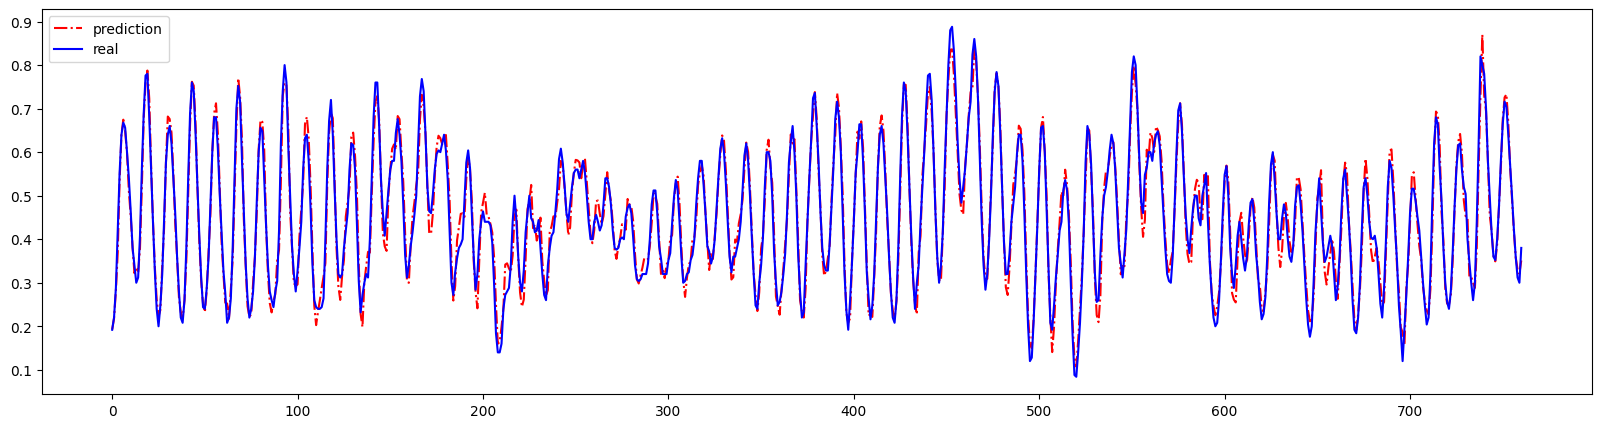

In [ ]:

import torch
from torch.utils.data import DataLoader
from config import Config

from utils.dataTools import *
from utils.models import CNNBiLSTM, BiLSTM_Reg
from utils.trainer import CNNBiLstm_evaluate,CNNBiLstmtrain

if __name__ == '__main__':
    config = Config()

    print("Data loading...")
    dataset = mydataReader("./dataProcessed/procan.csv")

    (train_X ,train_Y ), (val_X,val_Y), (test_X ,test_Y )= dataset.split(lookback=config.lookback,trainSet_ratio=0.833,valSet_ratio=0.08)








    trainSet = custom_dataset(train_X,train_Y)
    valSet = custom_dataset(val_X,val_Y)
    testSet = custom_dataset(test_X,test_Y)

    train_loader = DataLoader(trainSet, batch_size = config.batch_size,
                              shuffle=False, pin_memory=True, num_workers=4, drop_last=True)
    val_loader = DataLoader(valSet, batch_size = config.batch_size,
                              shuffle=False, pin_memory=True, num_workers=4, drop_last=False)
    test_loader = DataLoader(testSet, batch_size = config.batch_size,
                            shuffle=False, pin_memory=True, num_workers=4, drop_last=False)


    print("Model loading...")
    model = CNNBiLSTM(hidden_size=12,num_layers=2).to(config.device)
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.AdamW(model.parameters(),
                                 lr=config.learning_rate, weight_decay=config.weight_decay)

    print("Training...")
    model = CNNBiLstmtrain(model,
                  trainloader=train_loader,
                  valloader=val_loader,
                  criterion=criterion,
                  optimizer=optimizer,
                  config=config)

    print("Testing...", round(len(testSet)/config.batch_size))
    CNNBiLstm_evaluate(model, test_loader, config)


Data loading...


100%|██████████| 8740/8740 [00:00<00:00, 481565.58it/s]

测试集大小为761
Model loading...



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Training...


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 0 batch: 0 | loss: 0.4636019170284271
Epoch: 0 batch: 10 | loss: 0.41881296038627625
Epoch: 0 batch: 20 | loss: 0.3106910288333893
Epoch: 0 batch: 30 | loss: 0.16938596963882446
Epoch: 0 batch: 40 | loss: 0.0774289071559906
Epoch: 0 batch: 50 | loss: 0.04890662059187889
Epoch: 0 batch: 60 | loss: 0.030872467905282974
Epoch: 0 batch: 70 | loss: 0.011780701577663422
Epoch: 0 batch: 80 | loss: 0.019313443452119827
Epoch: 0 batch: 90 | loss: 0.036737989634275436
Epoch: 0 batch: 100 | loss: 0.03779760003089905
Epoch: 0 batch: 110 | loss: 0.016976026818156242
Epoch: 0 batch: 120 | loss: 0.018112944439053535
Epoch: 0 batch: 130 | loss: 0.034469399601221085
Epoch: 0 batch: 140 | loss: 0.03321394696831703
Epoch: 0 batch: 150 | loss: 0.015284571796655655
Epoch: 0 batch: 160 | loss: 0.02152322046458721
Epoch: 0 batch: 170 | loss: 0.028428684920072556
Epoch: 0 batch: 180 | loss: 0.034748002886772156
Epoch: 0 batch: 190 | loss: 0.018405988812446594
Epoch: 0 batch: 200 | loss: 0.0048097926191

26it [00:00, 81.34it/s]

Epoch: 0 valLoss: 0.02357426551106417



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 1 batch: 0 | loss: 0.022638477385044098
Epoch: 1 batch: 10 | loss: 0.0333230160176754
Epoch: 1 batch: 20 | loss: 0.0185743048787117
Epoch: 1 batch: 30 | loss: 0.005214294884353876
Epoch: 1 batch: 40 | loss: 0.021204177290201187
Epoch: 1 batch: 50 | loss: 0.041628167033195496
Epoch: 1 batch: 60 | loss: 0.026619279757142067
Epoch: 1 batch: 70 | loss: 0.011835702694952488
Epoch: 1 batch: 80 | loss: 0.014783753082156181
Epoch: 1 batch: 90 | loss: 0.044342897832393646
Epoch: 1 batch: 100 | loss: 0.040420908480882645
Epoch: 1 batch: 110 | loss: 0.013289897702634335
Epoch: 1 batch: 120 | loss: 0.015675116330385208
Epoch: 1 batch: 130 | loss: 0.03743138164281845
Epoch: 1 batch: 140 | loss: 0.0331893227994442
Epoch: 1 batch: 150 | loss: 0.015064329840242863
Epoch: 1 batch: 160 | loss: 0.016635602340102196
Epoch: 1 batch: 170 | loss: 0.026278195902705193
Epoch: 1 batch: 180 | loss: 0.033415332436561584
Epoch: 1 batch: 190 | loss: 0.01651153713464737
Epoch: 1 batch: 200 | loss: 0.005175489

26it [00:00, 79.70it/s]

Epoch: 1 valLoss: 0.02313418436996816



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 2 batch: 0 | loss: 0.02017252705991268
Epoch: 2 batch: 10 | loss: 0.03367224708199501
Epoch: 2 batch: 20 | loss: 0.02012266032397747
Epoch: 2 batch: 30 | loss: 0.0035037535708397627
Epoch: 2 batch: 40 | loss: 0.0208393894135952
Epoch: 2 batch: 50 | loss: 0.03970566764473915
Epoch: 2 batch: 60 | loss: 0.026568850502371788
Epoch: 2 batch: 70 | loss: 0.00880375038832426
Epoch: 2 batch: 80 | loss: 0.014349816367030144
Epoch: 2 batch: 90 | loss: 0.0423133447766304
Epoch: 2 batch: 100 | loss: 0.03797803074121475
Epoch: 2 batch: 110 | loss: 0.013234240934252739
Epoch: 2 batch: 120 | loss: 0.016636081039905548
Epoch: 2 batch: 130 | loss: 0.03279546648263931
Epoch: 2 batch: 140 | loss: 0.02961377613246441
Epoch: 2 batch: 150 | loss: 0.014058730565011501
Epoch: 2 batch: 160 | loss: 0.015670787543058395
Epoch: 2 batch: 170 | loss: 0.02518352121114731
Epoch: 2 batch: 180 | loss: 0.029333138838410378
Epoch: 2 batch: 190 | loss: 0.015194590203464031
Epoch: 2 batch: 200 | loss: 0.0044120228849

26it [00:00, 110.20it/s]

Epoch: 2 valLoss: 0.02039200390647166



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 3 batch: 0 | loss: 0.017925642430782318
Epoch: 3 batch: 10 | loss: 0.029589269310235977
Epoch: 3 batch: 20 | loss: 0.015699608251452446
Epoch: 3 batch: 30 | loss: 0.002119493205100298
Epoch: 3 batch: 40 | loss: 0.02218884415924549
Epoch: 3 batch: 50 | loss: 0.03587064519524574
Epoch: 3 batch: 60 | loss: 0.02168833278119564
Epoch: 3 batch: 70 | loss: 0.00786933209747076
Epoch: 3 batch: 80 | loss: 0.009951719082891941
Epoch: 3 batch: 90 | loss: 0.031402260065078735
Epoch: 3 batch: 100 | loss: 0.03519941493868828
Epoch: 3 batch: 110 | loss: 0.009877176024019718
Epoch: 3 batch: 120 | loss: 0.01393408328294754
Epoch: 3 batch: 130 | loss: 0.021405290812253952
Epoch: 3 batch: 140 | loss: 0.02172761969268322
Epoch: 3 batch: 150 | loss: 0.01058147568255663
Epoch: 3 batch: 160 | loss: 0.013027296401560307
Epoch: 3 batch: 170 | loss: 0.020011056214571
Epoch: 3 batch: 180 | loss: 0.02445654757320881
Epoch: 3 batch: 190 | loss: 0.0113856615498662
Epoch: 3 batch: 200 | loss: 0.005904614925384

26it [00:00, 115.87it/s]

Epoch: 3 valLoss: 0.012257047118833155



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 4 batch: 0 | loss: 0.012790415436029434
Epoch: 4 batch: 10 | loss: 0.01808580756187439
Epoch: 4 batch: 20 | loss: 0.008411319926381111
Epoch: 4 batch: 30 | loss: 0.0022692393977195024
Epoch: 4 batch: 40 | loss: 0.010247777216136456
Epoch: 4 batch: 50 | loss: 0.030483094975352287
Epoch: 4 batch: 60 | loss: 0.017676910385489464
Epoch: 4 batch: 70 | loss: 0.0030082720331847668
Epoch: 4 batch: 80 | loss: 0.008196325041353703
Epoch: 4 batch: 90 | loss: 0.01869337633252144
Epoch: 4 batch: 100 | loss: 0.015517235733568668
Epoch: 4 batch: 110 | loss: 0.005891742184758186
Epoch: 4 batch: 120 | loss: 0.00804691668599844
Epoch: 4 batch: 130 | loss: 0.012071537785232067
Epoch: 4 batch: 140 | loss: 0.009015888907015324
Epoch: 4 batch: 150 | loss: 0.004767341539263725
Epoch: 4 batch: 160 | loss: 0.004234517924487591
Epoch: 4 batch: 170 | loss: 0.008010884746909142
Epoch: 4 batch: 180 | loss: 0.010098199360072613
Epoch: 4 batch: 190 | loss: 0.00722650857642293
Epoch: 4 batch: 200 | loss: 0.006

26it [00:00, 111.84it/s]

Epoch: 4 valLoss: 0.004348785189390406



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 5 batch: 0 | loss: 0.0075924149714410305
Epoch: 5 batch: 10 | loss: 0.010993526317179203
Epoch: 5 batch: 20 | loss: 0.007067853584885597
Epoch: 5 batch: 30 | loss: 0.004189003724604845
Epoch: 5 batch: 40 | loss: 0.004106915555894375
Epoch: 5 batch: 50 | loss: 0.008683842606842518
Epoch: 5 batch: 60 | loss: 0.006256823893636465
Epoch: 5 batch: 70 | loss: 0.00322690955363214
Epoch: 5 batch: 80 | loss: 0.007060551550239325
Epoch: 5 batch: 90 | loss: 0.008665784262120724
Epoch: 5 batch: 100 | loss: 0.012247188948094845
Epoch: 5 batch: 110 | loss: 0.003967249300330877
Epoch: 5 batch: 120 | loss: 0.005167008377611637
Epoch: 5 batch: 130 | loss: 0.009765731170773506
Epoch: 5 batch: 140 | loss: 0.008381559513509274
Epoch: 5 batch: 150 | loss: 0.00537909148260951
Epoch: 5 batch: 160 | loss: 0.005523961968719959
Epoch: 5 batch: 170 | loss: 0.009324682876467705
Epoch: 5 batch: 180 | loss: 0.008714588358998299
Epoch: 5 batch: 190 | loss: 0.004565406125038862
Epoch: 5 batch: 200 | loss: 0.00

26it [00:00, 111.09it/s]

Epoch: 5 valLoss: 0.004161256699281371



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 6 batch: 0 | loss: 0.009046786464750767
Epoch: 6 batch: 10 | loss: 0.007679861504584551
Epoch: 6 batch: 20 | loss: 0.00285410531796515
Epoch: 6 batch: 30 | loss: 0.004074317403137684
Epoch: 6 batch: 40 | loss: 0.005050560459494591
Epoch: 6 batch: 50 | loss: 0.014315355569124222
Epoch: 6 batch: 60 | loss: 0.0071455067954957485
Epoch: 6 batch: 70 | loss: 0.0033134727273136377
Epoch: 6 batch: 80 | loss: 0.0065970937721431255
Epoch: 6 batch: 90 | loss: 0.0073722354136407375
Epoch: 6 batch: 100 | loss: 0.013460385613143444
Epoch: 6 batch: 110 | loss: 0.003721877932548523
Epoch: 6 batch: 120 | loss: 0.007882555015385151
Epoch: 6 batch: 130 | loss: 0.006432109046727419
Epoch: 6 batch: 140 | loss: 0.005618560593575239
Epoch: 6 batch: 150 | loss: 0.0038267746567726135
Epoch: 6 batch: 160 | loss: 0.0033519768621772528
Epoch: 6 batch: 170 | loss: 0.0082846162840724
Epoch: 6 batch: 180 | loss: 0.005324765108525753
Epoch: 6 batch: 190 | loss: 0.002933487296104431
Epoch: 6 batch: 200 | loss: 

26it [00:00, 120.81it/s]

Epoch: 6 valLoss: 0.0033494880427598944



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 7 batch: 0 | loss: 0.007671340834349394
Epoch: 7 batch: 10 | loss: 0.008037001825869083
Epoch: 7 batch: 20 | loss: 0.0038252321537584066
Epoch: 7 batch: 30 | loss: 0.004117434844374657
Epoch: 7 batch: 40 | loss: 0.005316431168466806
Epoch: 7 batch: 50 | loss: 0.011118698865175247
Epoch: 7 batch: 60 | loss: 0.004872525576502085
Epoch: 7 batch: 70 | loss: 0.001689232769422233
Epoch: 7 batch: 80 | loss: 0.003734366735443473
Epoch: 7 batch: 90 | loss: 0.006268541794270277
Epoch: 7 batch: 100 | loss: 0.005557910073548555
Epoch: 7 batch: 110 | loss: 0.0030147223733365536
Epoch: 7 batch: 120 | loss: 0.005570584908127785
Epoch: 7 batch: 130 | loss: 0.010737132281064987
Epoch: 7 batch: 140 | loss: 0.004902674816548824
Epoch: 7 batch: 150 | loss: 0.0039787571877241135
Epoch: 7 batch: 160 | loss: 0.0040208096615970135
Epoch: 7 batch: 170 | loss: 0.006682314444333315
Epoch: 7 batch: 180 | loss: 0.0043677096255123615
Epoch: 7 batch: 190 | loss: 0.0024659817572683096
Epoch: 7 batch: 200 | los

26it [00:00, 112.82it/s]

Epoch: 7 valLoss: 0.003043106233138479



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 8 batch: 0 | loss: 0.008494795300066471
Epoch: 8 batch: 10 | loss: 0.005434217397123575
Epoch: 8 batch: 20 | loss: 0.003675274783745408
Epoch: 8 batch: 30 | loss: 0.0038818996399641037
Epoch: 8 batch: 40 | loss: 0.005824284628033638
Epoch: 8 batch: 50 | loss: 0.0052138096652925014
Epoch: 8 batch: 60 | loss: 0.004855441860854626
Epoch: 8 batch: 70 | loss: 0.003010442713275552
Epoch: 8 batch: 80 | loss: 0.0028261523693799973
Epoch: 8 batch: 90 | loss: 0.005877687595784664
Epoch: 8 batch: 100 | loss: 0.004227551631629467
Epoch: 8 batch: 110 | loss: 0.0018199075711891055
Epoch: 8 batch: 120 | loss: 0.00523024145513773
Epoch: 8 batch: 130 | loss: 0.008157486096024513
Epoch: 8 batch: 140 | loss: 0.004076677840203047
Epoch: 8 batch: 150 | loss: 0.002988775260746479
Epoch: 8 batch: 160 | loss: 0.0026304377242922783
Epoch: 8 batch: 170 | loss: 0.003879321040585637
Epoch: 8 batch: 180 | loss: 0.004404427949339151
Epoch: 8 batch: 190 | loss: 0.0025025946088135242
Epoch: 8 batch: 200 | loss

26it [00:00, 113.61it/s]

Epoch: 8 valLoss: 0.0024812017922307564



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 9 batch: 0 | loss: 0.006212074775248766
Epoch: 9 batch: 10 | loss: 0.0037970682606101036
Epoch: 9 batch: 20 | loss: 0.003850780427455902
Epoch: 9 batch: 30 | loss: 0.0032945533748716116
Epoch: 9 batch: 40 | loss: 0.005470662377774715
Epoch: 9 batch: 50 | loss: 0.005734906531870365
Epoch: 9 batch: 60 | loss: 0.004262799397110939
Epoch: 9 batch: 70 | loss: 0.0020920305978506804
Epoch: 9 batch: 80 | loss: 0.00435496773570776
Epoch: 9 batch: 90 | loss: 0.0031038501765578985
Epoch: 9 batch: 100 | loss: 0.005817922297865152
Epoch: 9 batch: 110 | loss: 0.003346951911225915
Epoch: 9 batch: 120 | loss: 0.004583539441227913
Epoch: 9 batch: 130 | loss: 0.005979273468255997
Epoch: 9 batch: 140 | loss: 0.0031117156613618135
Epoch: 9 batch: 150 | loss: 0.004958734381943941
Epoch: 9 batch: 160 | loss: 0.004388118628412485
Epoch: 9 batch: 170 | loss: 0.0039601922035217285
Epoch: 9 batch: 180 | loss: 0.0033907515462487936
Epoch: 9 batch: 190 | loss: 0.0038820733316242695
Epoch: 9 batch: 200 | lo

26it [00:00, 111.58it/s]

Epoch: 9 valLoss: 0.002271587087483886
Testing... 28



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
29it [00:00, 102.85it/s]


r2Score:  0.9027186398738634
meanSquaredError:  0.0022700934741409886
RMSE:  0.04764549794199856
meanAbsoluteError:  0.03803240004608728


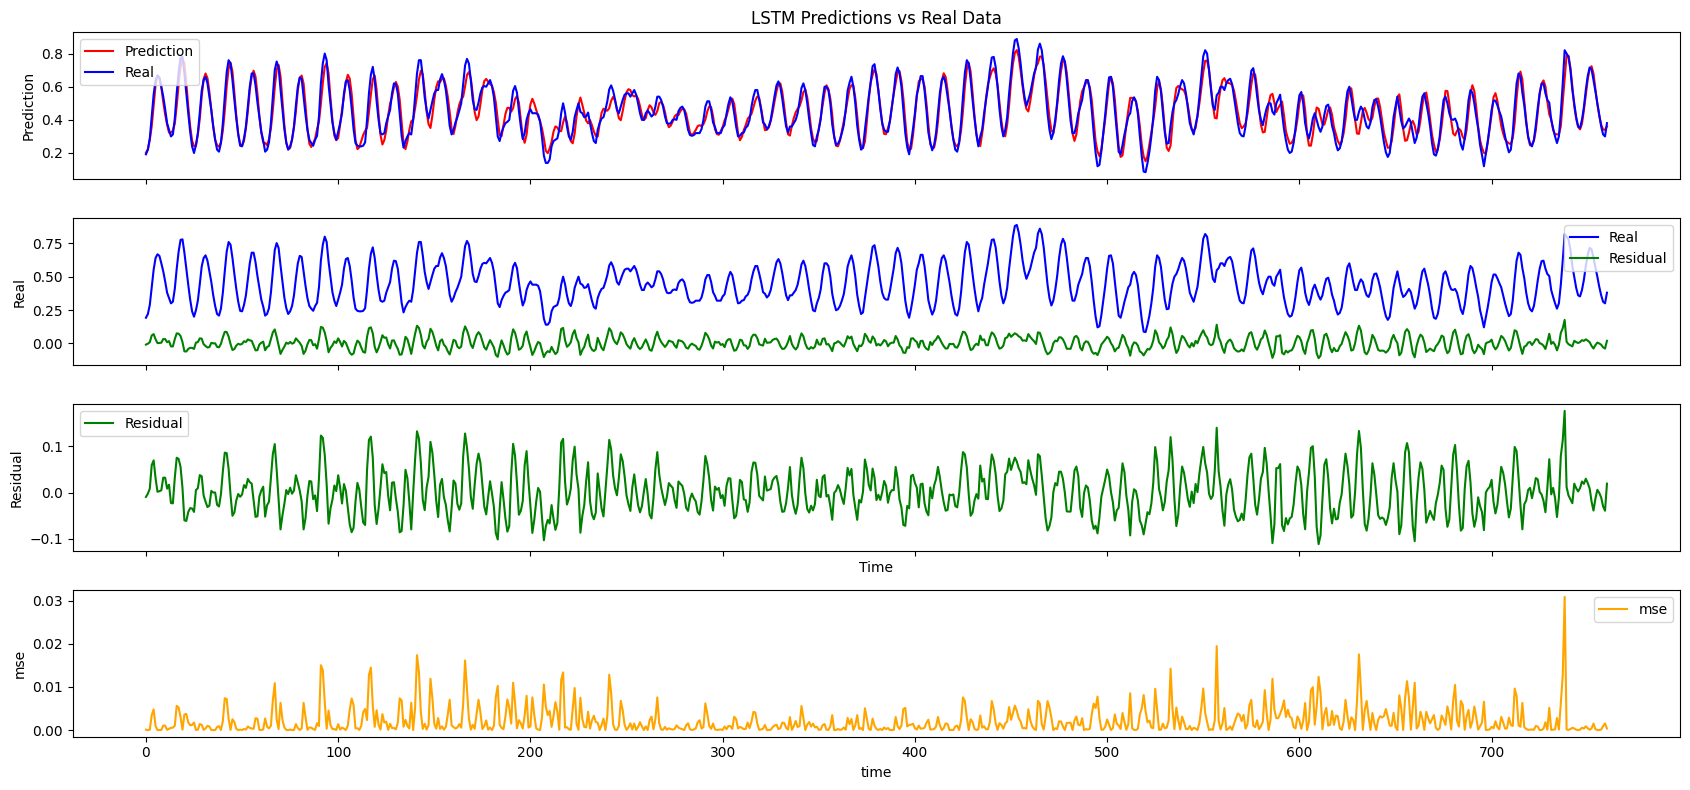

In [ ]:

import torch
from torch.utils.data import DataLoader
from config import Config

from utils.dataTools import *
from utils.models import CNNBiLSTM, BiLSTM_Reg
from utils.trainer import CNNBiLstm_evaluate,CNNBiLstmtrain
import matplotlib.pyplot as plt
if __name__ == '__main__':
    config = Config()

    print("Data loading...")
    dataset = mydataReader("./dataProcessed/procan.csv")

    (train_X ,train_Y ), (val_X,val_Y), (test_X ,test_Y )= dataset.split(lookback=config.lookback,trainSet_ratio=0.833,valSet_ratio=0.08)







    trainSet = custom_dataset(train_X,train_Y)
    valSet = custom_dataset(val_X,val_Y)
    testSet = custom_dataset(test_X,test_Y)

    train_loader = DataLoader(trainSet, batch_size = config.batch_size,
                              shuffle=False, pin_memory=True, num_workers=4, drop_last=True)
    val_loader = DataLoader(valSet, batch_size = config.batch_size,
                              shuffle=False, pin_memory=True, num_workers=4, drop_last=False)
    test_loader = DataLoader(testSet, batch_size = config.batch_size,
                            shuffle=False, pin_memory=True, num_workers=4, drop_last=False)


    print("Model loading...")
    model = CNNBiLSTM(hidden_size=12,num_layers=2).to(config.device)
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.AdamW(model.parameters(),
                                 lr=config.learning_rate, weight_decay=config.weight_decay)


    print("Training...")
    model = CNNBiLstmtrain(model,
                  trainloader=train_loader,
                  valloader=val_loader,
                  criterion=criterion,
                  optimizer=optimizer,
                  config=config)

    print("Testing...", round(len(testSet)/config.batch_size))
    CNNBiLstm_evaluate(model, test_loader, config)




In [ ]:
val_losses

NameError: name 'val_losses' is not defined

In [ ]:
print(val_losses)

NameError: name 'val_losses' is not defined

Data loading...


100%|██████████| 8740/8740 [00:00<00:00, 726379.95it/s]

测试集大小为761
Model loading...



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Configuration Parameters:
 - Batch size: 27
 - Lookback: 20
 - Epochs: 15
 - Learning rate: 0.001
 - Weight decay: 0.01
Training...


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 0 batch: 0 | loss: 0.10419178754091263
Epoch: 0 batch: 10 | loss: 0.07743993401527405
Epoch: 0 batch: 20 | loss: 0.034458693116903305
Epoch: 0 batch: 30 | loss: 0.003290853463113308
Epoch: 0 batch: 40 | loss: 0.027948632836341858
Epoch: 0 batch: 50 | loss: 0.04473843425512314
Epoch: 0 batch: 60 | loss: 0.02840322256088257
Epoch: 0 batch: 70 | loss: 0.013037758879363537
Epoch: 0 batch: 80 | loss: 0.020283063873648643
Epoch: 0 batch: 90 | loss: 0.04129428789019585
Epoch: 0 batch: 100 | loss: 0.03613503277301788
Epoch: 0 batch: 110 | loss: 0.01285270880907774
Epoch: 0 batch: 120 | loss: 0.01540658250451088
Epoch: 0 batch: 130 | loss: 0.037383247166872025
Epoch: 0 batch: 140 | loss: 0.03234890103340149
Epoch: 0 batch: 150 | loss: 0.017604578286409378
Epoch: 0 batch: 160 | loss: 0.01777045987546444
Epoch: 0 batch: 170 | loss: 0.02601727657020092
Epoch: 0 batch: 180 | loss: 0.03600839897990227
Epoch: 0 batch: 190 | loss: 0.01648336835205555
Epoch: 0 batch: 200 | loss: 0.00421949289739

26it [00:00, 53.64it/s]

Epoch: 0 | Train Loss: 0.02843948235375232 | Val Loss: 0.022428826906913696



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 1 batch: 0 | loss: 0.019541140645742416
Epoch: 1 batch: 10 | loss: 0.03072953224182129
Epoch: 1 batch: 20 | loss: 0.01705559901893139
Epoch: 1 batch: 30 | loss: 0.0021768705919384956
Epoch: 1 batch: 40 | loss: 0.021783076226711273
Epoch: 1 batch: 50 | loss: 0.03608480840921402
Epoch: 1 batch: 60 | loss: 0.02464725635945797
Epoch: 1 batch: 70 | loss: 0.008768567815423012
Epoch: 1 batch: 80 | loss: 0.010143788531422615
Epoch: 1 batch: 90 | loss: 0.03518011420965195
Epoch: 1 batch: 100 | loss: 0.03188062831759453
Epoch: 1 batch: 110 | loss: 0.008553247898817062
Epoch: 1 batch: 120 | loss: 0.01071847788989544
Epoch: 1 batch: 130 | loss: 0.019644392654299736
Epoch: 1 batch: 140 | loss: 0.01803484931588173
Epoch: 1 batch: 150 | loss: 0.007028638385236263
Epoch: 1 batch: 160 | loss: 0.003381410613656044
Epoch: 1 batch: 170 | loss: 0.0104698920622468
Epoch: 1 batch: 180 | loss: 0.009909014217555523
Epoch: 1 batch: 190 | loss: 0.004882194567471743
Epoch: 1 batch: 200 | loss: 0.0047405771

26it [00:00, 32.88it/s]

Epoch: 1 | Train Loss: 0.015080666242013287 | Val Loss: 0.004343390052129232



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 2 batch: 0 | loss: 0.005765435751527548
Epoch: 2 batch: 10 | loss: 0.008058253675699234
Epoch: 2 batch: 20 | loss: 0.004322575405240059
Epoch: 2 batch: 30 | loss: 0.0020159706473350525
Epoch: 2 batch: 40 | loss: 0.006216484121978283
Epoch: 2 batch: 50 | loss: 0.007439169567078352
Epoch: 2 batch: 60 | loss: 0.003643648698925972
Epoch: 2 batch: 70 | loss: 0.0020092071499675512
Epoch: 2 batch: 80 | loss: 0.0023922224063426256
Epoch: 2 batch: 90 | loss: 0.005975653883069754
Epoch: 2 batch: 100 | loss: 0.004933127202093601
Epoch: 2 batch: 110 | loss: 0.0021441455464810133
Epoch: 2 batch: 120 | loss: 0.0030263718217611313
Epoch: 2 batch: 130 | loss: 0.0044602882117033005
Epoch: 2 batch: 140 | loss: 0.0034997370094060898
Epoch: 2 batch: 150 | loss: 0.002453600289300084
Epoch: 2 batch: 160 | loss: 0.0020555274095386267
Epoch: 2 batch: 170 | loss: 0.0021879570558667183
Epoch: 2 batch: 180 | loss: 0.0029790368862450123
Epoch: 2 batch: 190 | loss: 0.0021142547484487295
Epoch: 2 batch: 200 

26it [00:00, 118.02it/s]

Epoch: 2 | Train Loss: 0.0035008578329714063 | Val Loss: 0.0016859443806192323



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 3 batch: 0 | loss: 0.0022824385669082403
Epoch: 3 batch: 10 | loss: 0.002726971171796322
Epoch: 3 batch: 20 | loss: 0.002535786246880889
Epoch: 3 batch: 30 | loss: 0.002053158590570092
Epoch: 3 batch: 40 | loss: 0.004356073215603828
Epoch: 3 batch: 50 | loss: 0.004705602768808603
Epoch: 3 batch: 60 | loss: 0.0020888387225568295
Epoch: 3 batch: 70 | loss: 0.0010097053600475192
Epoch: 3 batch: 80 | loss: 0.002735880436375737
Epoch: 3 batch: 90 | loss: 0.0032902120146900415
Epoch: 3 batch: 100 | loss: 0.002708789659664035
Epoch: 3 batch: 110 | loss: 0.0010392284020781517
Epoch: 3 batch: 120 | loss: 0.002076064934954047
Epoch: 3 batch: 130 | loss: 0.003584611462429166
Epoch: 3 batch: 140 | loss: 0.0016592630418017507
Epoch: 3 batch: 150 | loss: 0.002044221619144082
Epoch: 3 batch: 160 | loss: 0.0032369522377848625
Epoch: 3 batch: 170 | loss: 0.0017317726742476225
Epoch: 3 batch: 180 | loss: 0.0027537064161151648
Epoch: 3 batch: 190 | loss: 0.0014444708358496428
Epoch: 3 batch: 200 |

26it [00:00, 114.27it/s]

Epoch: 3 | Train Loss: 0.002585434186710287 | Val Loss: 0.0017181516991427892



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 4 batch: 0 | loss: 0.002042112173512578
Epoch: 4 batch: 10 | loss: 0.0015242367517203093
Epoch: 4 batch: 20 | loss: 0.0024780237581580877
Epoch: 4 batch: 30 | loss: 0.0013580030063167214
Epoch: 4 batch: 40 | loss: 0.004464344121515751
Epoch: 4 batch: 50 | loss: 0.0038251576479524374
Epoch: 4 batch: 60 | loss: 0.003087477758526802
Epoch: 4 batch: 70 | loss: 0.0012204642407596111
Epoch: 4 batch: 80 | loss: 0.0019897210877388716
Epoch: 4 batch: 90 | loss: 0.003261289559304714
Epoch: 4 batch: 100 | loss: 0.0018590821418911219
Epoch: 4 batch: 110 | loss: 0.0007112842868082225
Epoch: 4 batch: 120 | loss: 0.0023247881326824427
Epoch: 4 batch: 130 | loss: 0.0036047750618308783
Epoch: 4 batch: 140 | loss: 0.0014116360107436776
Epoch: 4 batch: 150 | loss: 0.0018470200011506677
Epoch: 4 batch: 160 | loss: 0.00254305568523705
Epoch: 4 batch: 170 | loss: 0.0014623465249314904
Epoch: 4 batch: 180 | loss: 0.0016647529555484653
Epoch: 4 batch: 190 | loss: 0.00118555489461869
Epoch: 4 batch: 200

26it [00:00, 81.23it/s] 

Epoch: 4 | Train Loss: 0.002404518784664322 | Val Loss: 0.0016196917181912594



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 5 batch: 0 | loss: 0.002366805449128151
Epoch: 5 batch: 10 | loss: 0.0018240339122712612
Epoch: 5 batch: 20 | loss: 0.0023861820809543133
Epoch: 5 batch: 30 | loss: 0.0013919989578425884
Epoch: 5 batch: 40 | loss: 0.0024988094810396433
Epoch: 5 batch: 50 | loss: 0.0028977436013519764
Epoch: 5 batch: 60 | loss: 0.0018750837771221995
Epoch: 5 batch: 70 | loss: 0.0018726454582065344
Epoch: 5 batch: 80 | loss: 0.0028681752737611532
Epoch: 5 batch: 90 | loss: 0.001981667010113597
Epoch: 5 batch: 100 | loss: 0.0019443300552666187
Epoch: 5 batch: 110 | loss: 0.0008622645982541144
Epoch: 5 batch: 120 | loss: 0.0026591361965984106
Epoch: 5 batch: 130 | loss: 0.0018502174643799663
Epoch: 5 batch: 140 | loss: 0.0009952039690688252
Epoch: 5 batch: 150 | loss: 0.0016133257886394858
Epoch: 5 batch: 160 | loss: 0.00169241928961128
Epoch: 5 batch: 170 | loss: 0.002172323176637292
Epoch: 5 batch: 180 | loss: 0.001667478121817112
Epoch: 5 batch: 190 | loss: 0.0009634967427700758
Epoch: 5 batch: 2

26it [00:00, 114.12it/s]

Epoch: 5 | Train Loss: 0.002244473081194626 | Val Loss: 0.0016090983414606844



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 6 batch: 0 | loss: 0.002716511720791459
Epoch: 6 batch: 10 | loss: 0.0015335759380832314
Epoch: 6 batch: 20 | loss: 0.0018220236524939537
Epoch: 6 batch: 30 | loss: 0.0014049564488232136
Epoch: 6 batch: 40 | loss: 0.0025940376799553633
Epoch: 6 batch: 50 | loss: 0.0029469996225088835
Epoch: 6 batch: 60 | loss: 0.002278027357533574
Epoch: 6 batch: 70 | loss: 0.0013858543243259192
Epoch: 6 batch: 80 | loss: 0.0025343718007206917
Epoch: 6 batch: 90 | loss: 0.0029362053610384464
Epoch: 6 batch: 100 | loss: 0.0013255542144179344
Epoch: 6 batch: 110 | loss: 0.0011031321482732892
Epoch: 6 batch: 120 | loss: 0.0017818043706938624
Epoch: 6 batch: 130 | loss: 0.002554443199187517
Epoch: 6 batch: 140 | loss: 0.0011791468132287264
Epoch: 6 batch: 150 | loss: 0.0019525297684594989
Epoch: 6 batch: 160 | loss: 0.002446256810799241
Epoch: 6 batch: 170 | loss: 0.0019469185499474406
Epoch: 6 batch: 180 | loss: 0.0016365785850211978
Epoch: 6 batch: 190 | loss: 0.0013248133473098278
Epoch: 6 batch:

26it [00:00, 111.81it/s]

Epoch: 6 | Train Loss: 0.002186063326961018 | Val Loss: 0.0016049082393297393



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 7 batch: 0 | loss: 0.003406251547858119
Epoch: 7 batch: 10 | loss: 0.0014100461266934872
Epoch: 7 batch: 20 | loss: 0.0018798549426719546
Epoch: 7 batch: 30 | loss: 0.0011586921755224466
Epoch: 7 batch: 40 | loss: 0.0023411130532622337
Epoch: 7 batch: 50 | loss: 0.002591891447082162
Epoch: 7 batch: 60 | loss: 0.0016689529875293374
Epoch: 7 batch: 70 | loss: 0.0015315859345719218
Epoch: 7 batch: 80 | loss: 0.0024800330866128206
Epoch: 7 batch: 90 | loss: 0.0017463014228269458
Epoch: 7 batch: 100 | loss: 0.0012922872556373477
Epoch: 7 batch: 110 | loss: 0.0008063442073762417
Epoch: 7 batch: 120 | loss: 0.001735661644488573
Epoch: 7 batch: 130 | loss: 0.0016753121744841337
Epoch: 7 batch: 140 | loss: 0.001205706619657576
Epoch: 7 batch: 150 | loss: 0.0016406542854383588
Epoch: 7 batch: 160 | loss: 0.0021824839059263468
Epoch: 7 batch: 170 | loss: 0.0011949300533160567
Epoch: 7 batch: 180 | loss: 0.0018287737620994449
Epoch: 7 batch: 190 | loss: 0.0009678200003691018
Epoch: 7 batch:

26it [00:00, 71.37it/s]

Epoch: 7 | Train Loss: 0.002106045954211591 | Val Loss: 0.0014078924001089557



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 8 batch: 0 | loss: 0.002190558472648263
Epoch: 8 batch: 10 | loss: 0.001733791665174067
Epoch: 8 batch: 20 | loss: 0.0017427743878215551
Epoch: 8 batch: 30 | loss: 0.0012912149541079998
Epoch: 8 batch: 40 | loss: 0.0035718276631087065
Epoch: 8 batch: 50 | loss: 0.003282206365838647
Epoch: 8 batch: 60 | loss: 0.00176235509570688
Epoch: 8 batch: 70 | loss: 0.001488321926444769
Epoch: 8 batch: 80 | loss: 0.0018709718715399504
Epoch: 8 batch: 90 | loss: 0.0024633826687932014
Epoch: 8 batch: 100 | loss: 0.0017385071841999888
Epoch: 8 batch: 110 | loss: 0.001268935389816761
Epoch: 8 batch: 120 | loss: 0.0018906017066910863
Epoch: 8 batch: 130 | loss: 0.002281893976032734
Epoch: 8 batch: 140 | loss: 0.0012326628202572465
Epoch: 8 batch: 150 | loss: 0.0018606149824336171
Epoch: 8 batch: 160 | loss: 0.0019853427074849606
Epoch: 8 batch: 170 | loss: 0.001577310380525887
Epoch: 8 batch: 180 | loss: 0.0022925594821572304
Epoch: 8 batch: 190 | loss: 0.0007963769603520632
Epoch: 8 batch: 200 

26it [00:00, 121.73it/s]

Epoch: 8 | Train Loss: 0.0020683304840338774 | Val Loss: 0.0015683119515079722



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 9 batch: 0 | loss: 0.00250473665073514
Epoch: 9 batch: 10 | loss: 0.0015952135436236858
Epoch: 9 batch: 20 | loss: 0.0017693365225568414
Epoch: 9 batch: 30 | loss: 0.0010594691848382354
Epoch: 9 batch: 40 | loss: 0.0031745892483741045
Epoch: 9 batch: 50 | loss: 0.0029133851639926434
Epoch: 9 batch: 60 | loss: 0.0024143236223608255
Epoch: 9 batch: 70 | loss: 0.001472750212997198
Epoch: 9 batch: 80 | loss: 0.0021299782674759626
Epoch: 9 batch: 90 | loss: 0.0023708592634648085
Epoch: 9 batch: 100 | loss: 0.0015031754737719893
Epoch: 9 batch: 110 | loss: 0.0008215971756726503
Epoch: 9 batch: 120 | loss: 0.0022434501443058252
Epoch: 9 batch: 130 | loss: 0.0019427507650107145
Epoch: 9 batch: 140 | loss: 0.0011613661190494895
Epoch: 9 batch: 150 | loss: 0.0020269679371267557
Epoch: 9 batch: 160 | loss: 0.00229962938465178
Epoch: 9 batch: 170 | loss: 0.0016153121832758188
Epoch: 9 batch: 180 | loss: 0.0019648540765047073
Epoch: 9 batch: 190 | loss: 0.001215502037666738
Epoch: 9 batch: 2

26it [00:00, 122.62it/s]

Epoch: 9 | Train Loss: 0.002062206067401071 | Val Loss: 0.0015642025153449163



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 10 batch: 0 | loss: 0.0021200343035161495
Epoch: 10 batch: 10 | loss: 0.00189597113057971
Epoch: 10 batch: 20 | loss: 0.0017622752347961068
Epoch: 10 batch: 30 | loss: 0.0011517169186845422
Epoch: 10 batch: 40 | loss: 0.0036684165243059397
Epoch: 10 batch: 50 | loss: 0.00351105909794569
Epoch: 10 batch: 60 | loss: 0.002063641557469964
Epoch: 10 batch: 70 | loss: 0.001190146547742188
Epoch: 10 batch: 80 | loss: 0.0020940701942890882
Epoch: 10 batch: 90 | loss: 0.0016179040540009737
Epoch: 10 batch: 100 | loss: 0.0010754739632830024
Epoch: 10 batch: 110 | loss: 0.0007946003461256623
Epoch: 10 batch: 120 | loss: 0.0019465680234134197
Epoch: 10 batch: 130 | loss: 0.001418131636455655
Epoch: 10 batch: 140 | loss: 0.0013444508658722043
Epoch: 10 batch: 150 | loss: 0.0019958624616265297
Epoch: 10 batch: 160 | loss: 0.0019404726335778832
Epoch: 10 batch: 170 | loss: 0.0013116513146087527
Epoch: 10 batch: 180 | loss: 0.0018996007274836302
Epoch: 10 batch: 190 | loss: 0.000955044233705848

26it [00:00, 113.99it/s]

Epoch: 10 | Train Loss: 0.001991104553142029 | Val Loss: 0.0015305967422949937



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 11 batch: 0 | loss: 0.003102025715634227
Epoch: 11 batch: 10 | loss: 0.0015882925363257527
Epoch: 11 batch: 20 | loss: 0.001917744637466967
Epoch: 11 batch: 30 | loss: 0.0009493945981375873
Epoch: 11 batch: 40 | loss: 0.002892239484935999
Epoch: 11 batch: 50 | loss: 0.0026279061567038298
Epoch: 11 batch: 60 | loss: 0.0023600237909704447
Epoch: 11 batch: 70 | loss: 0.0011223646579310298
Epoch: 11 batch: 80 | loss: 0.001977920299395919
Epoch: 11 batch: 90 | loss: 0.0011596910189837217
Epoch: 11 batch: 100 | loss: 0.0010089208371937275
Epoch: 11 batch: 110 | loss: 0.0011826494010165334
Epoch: 11 batch: 120 | loss: 0.0021993080154061317
Epoch: 11 batch: 130 | loss: 0.0021122926846146584
Epoch: 11 batch: 140 | loss: 0.0009159016190096736
Epoch: 11 batch: 150 | loss: 0.0018816733499988914
Epoch: 11 batch: 160 | loss: 0.0023743484634906054
Epoch: 11 batch: 170 | loss: 0.0012712287716567516
Epoch: 11 batch: 180 | loss: 0.001639993628486991
Epoch: 11 batch: 190 | loss: 0.0013861017068848

26it [00:00, 103.20it/s]

Epoch: 11 | Train Loss: 0.0019732473870794735 | Val Loss: 0.0015977487228406781



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 12 batch: 0 | loss: 0.002790462924167514
Epoch: 12 batch: 10 | loss: 0.0018314955523237586
Epoch: 12 batch: 20 | loss: 0.0014856195775792003
Epoch: 12 batch: 30 | loss: 0.0011486420407891273
Epoch: 12 batch: 40 | loss: 0.002808050950989127
Epoch: 12 batch: 50 | loss: 0.002897669794037938
Epoch: 12 batch: 60 | loss: 0.0022226942237466574
Epoch: 12 batch: 70 | loss: 0.0014675534330308437
Epoch: 12 batch: 80 | loss: 0.0013678001705557108
Epoch: 12 batch: 90 | loss: 0.0019183828262612224
Epoch: 12 batch: 100 | loss: 0.0014144183369353414
Epoch: 12 batch: 110 | loss: 0.0010015742154791951
Epoch: 12 batch: 120 | loss: 0.0025353445671498775
Epoch: 12 batch: 130 | loss: 0.002435392001643777
Epoch: 12 batch: 140 | loss: 0.001104419818148017
Epoch: 12 batch: 150 | loss: 0.0010713032679632306
Epoch: 12 batch: 160 | loss: 0.0027535955887287855
Epoch: 12 batch: 170 | loss: 0.0009269493748433888
Epoch: 12 batch: 180 | loss: 0.0021142521873116493
Epoch: 12 batch: 190 | loss: 0.0008363687084056

26it [00:00, 99.45it/s] 

Epoch: 12 | Train Loss: 0.0020109333033451887 | Val Loss: 0.0015202158508062966



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 13 batch: 0 | loss: 0.002551745856180787
Epoch: 13 batch: 10 | loss: 0.0013734844978898764
Epoch: 13 batch: 20 | loss: 0.0015848154434934258
Epoch: 13 batch: 30 | loss: 0.0011986796744167805
Epoch: 13 batch: 40 | loss: 0.0026914719492197037
Epoch: 13 batch: 50 | loss: 0.0031092066783457994
Epoch: 13 batch: 60 | loss: 0.0015650349669158459
Epoch: 13 batch: 70 | loss: 0.0014260505558922887
Epoch: 13 batch: 80 | loss: 0.002563498681411147
Epoch: 13 batch: 90 | loss: 0.0016261587152257562
Epoch: 13 batch: 100 | loss: 0.0007907446124590933
Epoch: 13 batch: 110 | loss: 0.0007446355884894729
Epoch: 13 batch: 120 | loss: 0.0018180216429755092
Epoch: 13 batch: 130 | loss: 0.0014507881132885814
Epoch: 13 batch: 140 | loss: 0.0009032654925249517
Epoch: 13 batch: 150 | loss: 0.0022088985424488783
Epoch: 13 batch: 160 | loss: 0.002613091142848134
Epoch: 13 batch: 170 | loss: 0.0011265495559200644
Epoch: 13 batch: 180 | loss: 0.0014910598983988166
Epoch: 13 batch: 190 | loss: 0.00102636683732

26it [00:00, 115.06it/s]

Epoch: 13 | Train Loss: 0.0020141639158373775 | Val Loss: 0.0014328428473946702



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 14 batch: 0 | loss: 0.002864052541553974
Epoch: 14 batch: 10 | loss: 0.0014447903959080577
Epoch: 14 batch: 20 | loss: 0.001982168760150671
Epoch: 14 batch: 30 | loss: 0.00111756706610322
Epoch: 14 batch: 40 | loss: 0.002883742330595851
Epoch: 14 batch: 50 | loss: 0.001992417499423027
Epoch: 14 batch: 60 | loss: 0.0016343356110155582
Epoch: 14 batch: 70 | loss: 0.0013080290518701077
Epoch: 14 batch: 80 | loss: 0.0025545726530253887
Epoch: 14 batch: 90 | loss: 0.0014708382077515125
Epoch: 14 batch: 100 | loss: 0.0011503348359838128
Epoch: 14 batch: 110 | loss: 0.0007805385976098478
Epoch: 14 batch: 120 | loss: 0.0015952623216435313
Epoch: 14 batch: 130 | loss: 0.0022004072088748217
Epoch: 14 batch: 140 | loss: 0.0015287193236872554
Epoch: 14 batch: 150 | loss: 0.0018840538104996085
Epoch: 14 batch: 160 | loss: 0.0024029072374105453
Epoch: 14 batch: 170 | loss: 0.0013796461280435324
Epoch: 14 batch: 180 | loss: 0.0020271693356335163
Epoch: 14 batch: 190 | loss: 0.00085374276386573

26it [00:00, 86.95it/s]


Epoch: 14 | Train Loss: 0.001967764456196408 | Val Loss: 0.0018140753936785189


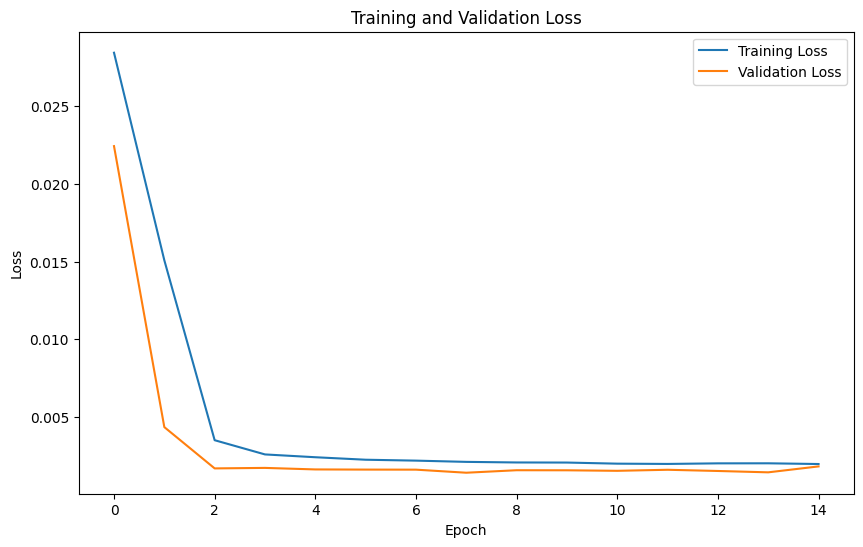

Testing... 28


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
29it [00:00, 109.86it/s]


r2Score:  0.9347425331600285
meanSquaredError:  0.0015228050822923293
RMSE:  0.03902313521864087
meanAbsoluteError:  0.031620573825184524


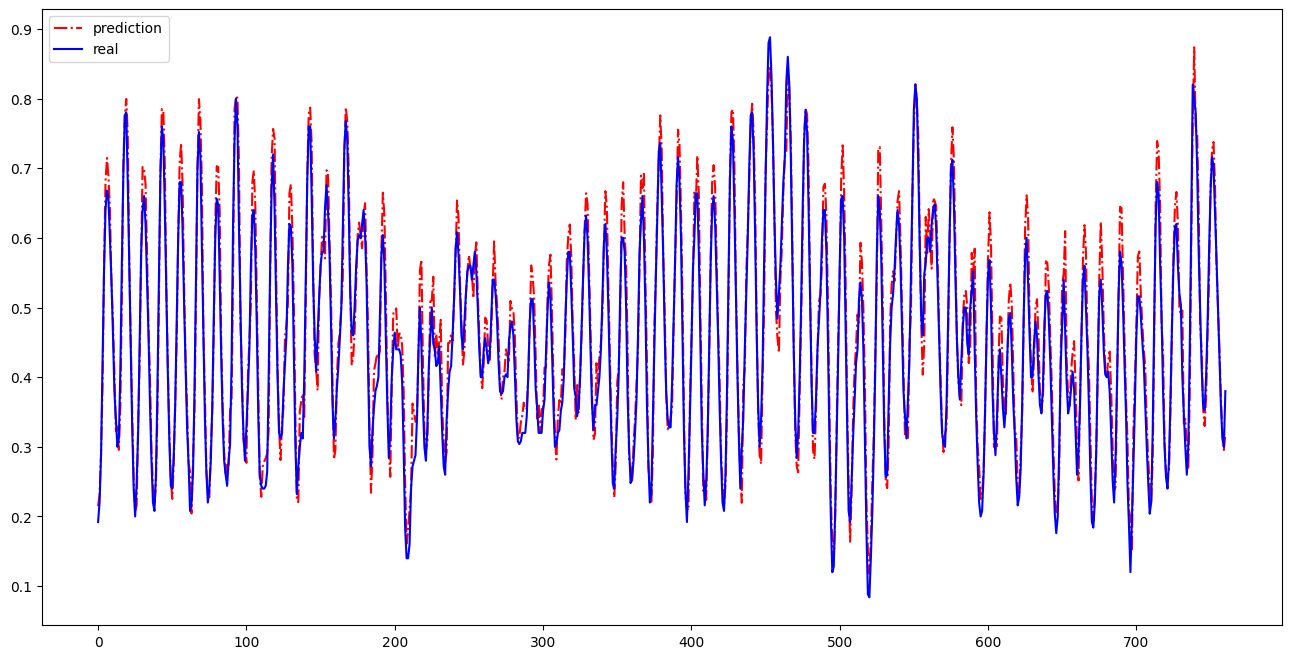

In [ ]:

import torch
from torch.utils.data import DataLoader
from config import Config

from utils.dataTools import *
from utils.models import CNNBiLSTM, BiLSTM_Reg
from utils.trainer import CNNBiLstm_evaluate,CNNBiLstmtrain

if __name__ == '__main__':
    config = Config()

    print("Data loading...")
    dataset = mydataReader("./dataProcessed/procan.csv")

    (train_X ,train_Y ), (val_X,val_Y), (test_X ,test_Y )= dataset.split(lookback=config.lookback,trainSet_ratio=0.833,valSet_ratio=0.08)







    trainSet = custom_dataset(train_X,train_Y)
    valSet = custom_dataset(val_X,val_Y)
    testSet = custom_dataset(test_X,test_Y)

    train_loader = DataLoader(trainSet, batch_size = config.batch_size,
                              shuffle=False, pin_memory=True, num_workers=4, drop_last=True)
    val_loader = DataLoader(valSet, batch_size = config.batch_size,
                              shuffle=False, pin_memory=True, num_workers=4, drop_last=False)
    test_loader = DataLoader(testSet, batch_size = config.batch_size,
                            shuffle=False, pin_memory=True, num_workers=4, drop_last=False)


    print("Model loading...")
    model = CNNBiLSTM(hidden_size=12,num_layers=2).to(config.device)
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.AdamW(model.parameters(),
                                 lr=config.learning_rate, weight_decay=config.weight_decay)
    print(f"Configuration Parameters:")
    print(f" - Batch size: {config.batch_size}")
    print(f" - Lookback: {config.lookback}")
    print(f" - Epochs: {config.epoch_size}")
    print(f" - Learning rate: {config.learning_rate}")
    print(f" - Weight decay: {config.weight_decay}")

    print("Training...")
    model = CNNBiLstmtrain(model,
                  trainloader=train_loader,
                  valloader=val_loader,
                  criterion=criterion,
                  optimizer=optimizer,
                  config=config)

    print("Testing...", round(len(testSet)/config.batch_size))
    CNNBiLstm_evaluate(model, test_loader, config)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cd -r /content/Tidal_try /content/drive/MyDrive/Tidal_try1

/bin/bash: line 1: cd: -r: invalid option
cd: usage: cd [-L|[-P [-e]] [-@]] [dir]


In [ ]:
import torch
from torch.utils.data import DataLoader
from config import Config

from utils.dataTools import *
from utils.models import CNNBiLSTM, BiLSTM_Reg
from utils.trainer import CNNBiLstm_evaluate,CNNBiLstmtrain

if __name__ == '__main__':
    config = Config()

    print("Data loading...")
    dataset = mydataReader("./dataProcessed/procan.csv")

    (train_X ,train_Y ), (val_X,val_Y), (test_X ,test_Y )= dataset.split(lookback=config.lookback,trainSet_ratio=0.833,valSet_ratio=0.08)








    trainSet = custom_dataset(train_X,train_Y)
    valSet = custom_dataset(val_X,val_Y)
    testSet = custom_dataset(test_X,test_Y)

    train_loader = DataLoader(trainSet, batch_size = config.batch_size,
                              shuffle=False, pin_memory=True, num_workers=4, drop_last=True)
    val_loader = DataLoader(valSet, batch_size = config.batch_size,
                              shuffle=False, pin_memory=True, num_workers=4, drop_last=False)
    test_loader = DataLoader(testSet, batch_size = config.batch_size,
                            shuffle=False, pin_memory=True, num_workers=4, drop_last=False)


    print("Model loading...")
    model = CNNBiLSTM(hidden_size=12,num_layers=2).to(config.device)
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.AdamW(model.parameters(),
                                 lr=config.learning_rate, weight_decay=config.weight_decay)
    print(f"Configuration Parameters:")
    print(f" - Batch size: {config.batch_size}")
    print(f" - Lookback: {config.lookback}")
    print(f" - Epochs: {config.epoch_size}")
    print(f" - Learning rate: {config.learning_rate}")
    print(f" - Weight decay: {config.weight_decay}")

    print("Training...")
    model = CNNBiLstmtrain(model,
                  trainloader=train_loader,
                  valloader=val_loader,
                  criterion=criterion,
                  optimizer=optimizer,
                  config=config)

    print("Testing...", round(len(testSet)/config.batch_size))
    CNNBiLstm_evaluate(model, test_loader, config)


Data loading...


100%|██████████| 8740/8740 [00:00<00:00, 833595.98it/s]

测试集大小为761
Model loading...
Configuration Parameters:
 - Batch size: 27
 - Lookback: 20
 - Epochs: 10
 - Learning rate: 0.001
 - Weight decay: 0.01
Training...



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 0 batch: 0 | loss: 0.32747337222099304
Epoch: 0 batch: 10 | loss: 0.2812316119670868
Epoch: 0 batch: 20 | loss: 0.16962510347366333
Epoch: 0 batch: 30 | loss: 0.06858185678720474
Epoch: 0 batch: 40 | loss: 0.026011286303400993
Epoch: 0 batch: 50 | loss: 0.040542032569646835
Epoch: 0 batch: 60 | loss: 0.02662907913327217
Epoch: 0 batch: 70 | loss: 0.009749840945005417
Epoch: 0 batch: 80 | loss: 0.019766915589571
Epoch: 0 batch: 90 | loss: 0.03661125525832176
Epoch: 0 batch: 100 | loss: 0.03247346356511116
Epoch: 0 batch: 110 | loss: 0.011710668914020061
Epoch: 0 batch: 120 | loss: 0.016164647415280342
Epoch: 0 batch: 130 | loss: 0.03443066030740738
Epoch: 0 batch: 140 | loss: 0.03024841658771038
Epoch: 0 batch: 150 | loss: 0.014482490718364716
Epoch: 0 batch: 160 | loss: 0.016512678936123848
Epoch: 0 batch: 170 | loss: 0.024671128019690514
Epoch: 0 batch: 180 | loss: 0.031590454280376434
Epoch: 0 batch: 190 | loss: 0.016161827370524406
Epoch: 0 batch: 200 | loss: 0.00462184427306

24it [00:00, 120.56it/s]

Shape of Y[:, t]: torch.Size([27])
Shape of prediction: torch.Size([27])
Shape of Y[:, t]: torch.Size([27])
Shape of prediction: torch.Size([27])
Shape of Y[:, t]: torch.Size([27])
Shape of prediction: torch.Size([27])
Shape of Y[:, t]: torch.Size([27])
Shape of prediction: torch.Size([27])
Shape of Y[:, t]: torch.Size([27])
Shape of prediction: torch.Size([27])
Shape of Y[:, t]: torch.Size([27])
Shape of prediction: torch.Size([27])
Shape of Y[:, t]: torch.Size([27])
Shape of prediction: torch.Size([27])
Shape of Y[:, t]: torch.Size([27])
Shape of prediction: torch.Size([27])
Shape of Y[:, t]: torch.Size([27])
Shape of prediction: torch.Size([27])
Shape of Y[:, t]: torch.Size([27])
Shape of prediction: torch.Size([27])
Shape of Y[:, t]: torch.Size([27])
Shape of prediction: torch.Size([27])
Shape of Y[:, t]: torch.Size([27])
Shape of prediction: torch.Size([27])
Shape of Y[:, t]: torch.Size([27])
Shape of prediction: torch.Size([27])
Shape of Y[:, t]: torch.Size([27])
Shape of predict

26it [00:00, 99.65it/s] 


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (26,) + inhomogeneous part.